In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
df = pd.read_csv(r"C:\Users\adity\Downloads\predictive_maintenance.csv")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [5]:
df.drop(columns=["UDI", "Product ID", "Type", "Target"], inplace=True)

In [6]:
df = df[df["Failure Type"].notna()]  # Keep only rows with a known failure type

In [7]:
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,298.1,308.6,1551,42.8,0,No Failure
1,298.2,308.7,1408,46.3,3,No Failure
2,298.1,308.5,1498,49.4,5,No Failure
3,298.2,308.6,1433,39.5,7,No Failure
4,298.2,308.7,1408,40.0,9,No Failure


In [8]:
df.tail()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
9995,298.8,308.4,1604,29.5,14,No Failure
9996,298.9,308.4,1632,31.8,17,No Failure
9997,299.0,308.6,1645,33.4,22,No Failure
9998,299.0,308.7,1408,48.5,25,No Failure
9999,299.0,308.7,1500,40.2,30,No Failure


C:\Users\adity\AppData\Local\Temp\ipykernel_25124\1722672330.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Failure Type", palette="Set2")


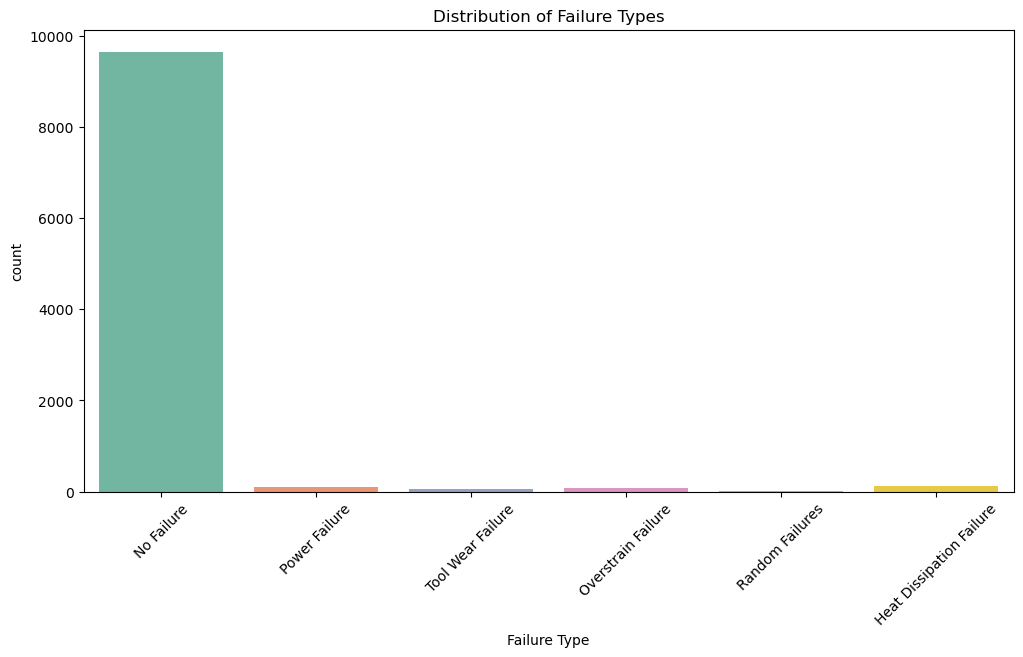

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Failure Type", palette="Set2")
plt.title("Distribution of Failure Types")
plt.xticks(rotation=45)
plt.show()

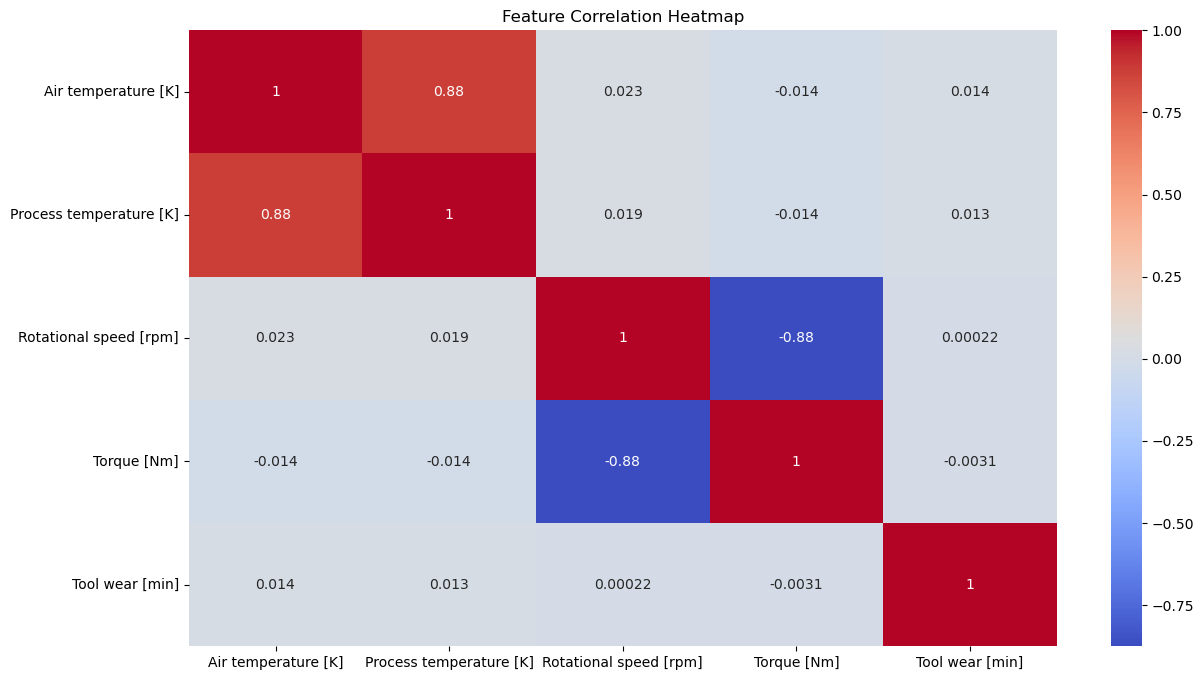

In [10]:
plt.figure(figsize=(14, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder
failure_encoder = LabelEncoder()
df["failure_type_encoded"] = failure_encoder.fit_transform(df["Failure Type"])
feature_encoders = {}
X = df.drop(columns=["Failure Type", "failure_type_encoded"])

for col in X.select_dtypes(include="object").columns:
    enc = LabelEncoder()
    X[col] = enc.fit_transform(X[col])
    feature_encoders[col] = enc

In [12]:
X

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,298.1,308.6,1551,42.8,0
1,298.2,308.7,1408,46.3,3
2,298.1,308.5,1498,49.4,5
3,298.2,308.6,1433,39.5,7
4,298.2,308.7,1408,40.0,9
...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14
9996,298.9,308.4,1632,31.8,17
9997,299.0,308.6,1645,33.4,22
9998,299.0,308.7,1408,48.5,25


In [16]:
# Encode failure type
le = LabelEncoder()
df["failure_type_encoded"] = le.fit_transform(df["Failure Type"])

# Separate features and target
X = df.drop(columns=["Failure Type", "failure_type_encoded"])

# Encode categorical features in X
for col in X.select_dtypes(include="object").columns:
    X[col] = LabelEncoder().fit_transform(X[col])

y = df["failure_type_encoded"]

In [17]:
y

0       1
1       1
2       1
3       1
4       1
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Name: failure_type_encoded, Length: 10000, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

C:\Users\adity\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
                           precision    recall  f1-score   support

Heat Dissipation Failure       0.92      0.80      0.86        15
              No Failure       0.99      1.00      0.99      1935
      Overstrain Failure       0.80      0.62      0.70        13
           Power Failure       0.79      0.75      0.77        20
         Random Failures       0.00      0.00      0.00         6
       Tool Wear Failure       0.00      0.00      0.00        11

                accuracy                           0.98      2000
               macro avg       0.58      0.53      0.55      2000
            weighted avg       0.97      0.98      0.98      2000



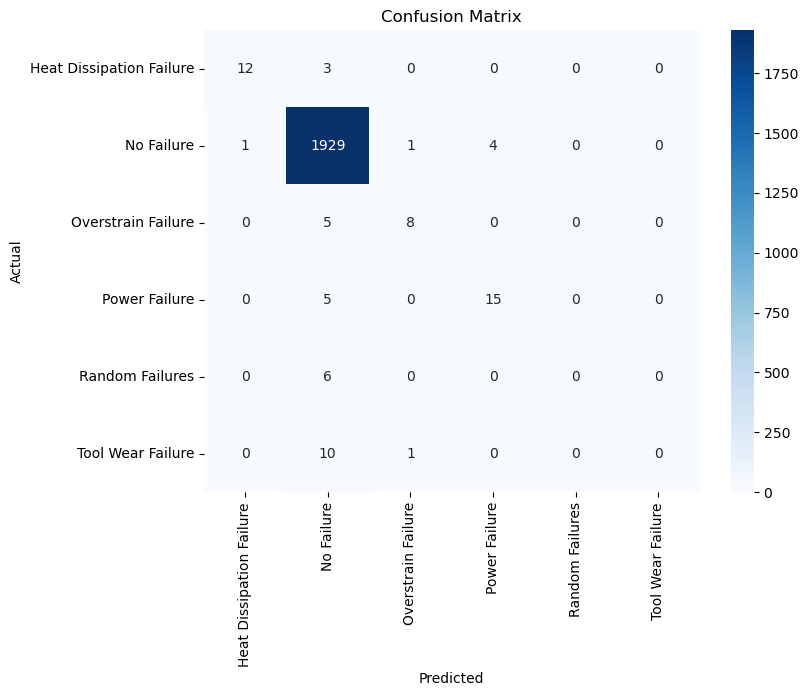

In [20]:
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [21]:
print("Enter values for the following features:")
user_input = {}

for col in X.columns:
    val = input(f"{col}: ")
    try:
        user_input[col] = float(val)
    except ValueError:
        user_input[col] = val  # In case of categorical input

user_df = pd.DataFrame([user_input])
predicted_class = model.predict(user_df)[0]
print(f"\nPredicted Failure Type: {le.inverse_transform([predicted_class])[0]}")

Enter values for the following features:


Air temperature [K]:  298.4
Process temperature [K]:  308.2
Rotational speed [rpm]:  1282
Torque [Nm]:  60.7
Tool wear [min]:  216



Predicted Failure Type: Overstrain Failure


In [22]:
import joblib

# Bundle everything into one dictionary
bundle = {
    "model": model,
    "failure_encoder": failure_encoder,
    "feature_encoders": feature_encoders
}

# Save to a single .pkl file
joblib.dump(bundle, "failure_model_bundle.pkl")

['failure_model_bundle.pkl']